In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [4]:
path = r'table_18_cleaned.csv'
df = pd.read_csv(path, index_col=0)
df = df.fillna(df.mean())
df = df.round(2)
df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1994,3.09,3.05,3.06,3.05,3.03,3.02,3.00,2.98,2.97,2.97,2.97,2.96
1995,2.91,2.89,2.88,2.87,2.86,2.84,2.82,2.79,2.75,2.74,2.74,2.74
1996,2.66,2.64,2.64,2.63,2.62,2.60,2.60,2.58,2.58,2.57,2.57,2.55
1997,2.52,2.51,2.50,2.50,2.49,2.47,2.46,2.45,2.44,2.43,2.41,2.40
1998,2.37,2.33,2.31,2.30,2.27,2.24,2.23,2.22,2.21,2.21,2.18,2.18


The Inflation Tale: How Peso Purchasing Power Change Every Year

In [5]:
melt_df = (df.reset_index().melt(id_vars=['Year'], var_name='Month', value_name='Peso Purchasing Power'))

melt_df.sample(5)

,Year,Month,Peso Purchasing Power
105,2003,Apr,1.81
291,1997,Oct,2.43
130,1996,May,2.62
132,1998,May,2.27
339,2013,Nov,1.13


In [6]:
%pip install -q kaleido
# Area chart using Plotly Express
import plotly.express as px

fig = px.area(
    melt_df,
    x='Year',
    y='Peso Purchasing Power',
    color='Month',
    line_group='Month',
    labels={'Dec': 'Value of One Peso (Base Year 2018)'},
    title='Peso Purchasing Power by Year and Month',
    template='plotly_white',
    height=500
)
fig.update_layout(legend_title_text='Month', legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))

# Get the Dec values for each year
# ...existing code...
fig.write_image("peso_purchasing_power.svg")
# ...existing code...

fig.show()


Note: you may need to restart the kernel to use updated packages.


In [7]:
fig.add_shape(
    type="rect",
    x0="2007", x1="2009",
    y0=0, y1=1,  # Will be updated below
    fillcolor="red",
    opacity=0.2,
    layer="below",
    line_width=0,
    yref="paper"  # This makes y0=0 (bottom), y1=1 (top) of the plot area
)

fig.add_shape(
    type="rect",
    x0="2020", x1="2023",
    y0=0, y1=1,  # Will be updated below
    fillcolor="blue",
    opacity=0.2,
    layer="below",
    line_width=0,
    yref="paper"  # This makes y0=0 (bottom), y1=1 (top) of the plot area
)


fig.add_annotation(
    x="2008",
    y=1,
    text="Global Recession",
    showarrow=False,
    font=dict(size=12, color="red"),
    yref="paper"
)

fig.add_annotation(
    x="2021",
    y=1,
    text="COVID-19 Pandemic",
    showarrow=False,
    font=dict(size=12, color="blue"),
    yref="paper"
)


In [8]:
rice = pd.read_excel("RicePriceHistory.xlsx")

rice

,Year,Rice Price
0,1994,5.90
1,1995,7.24
2,1996,8.13
3,1997,7.92
4,1998,8.30
5,1999,7.87
6,2000,8.42
7,2001,8.17
8,2002,8.82
9,2003,8.84


In [9]:
fig.add_shape(
    type="rect",
    x0="2007", x1="2009",
    y0=0, y1=1,  # Will be updated below
    fillcolor="red",
    opacity=0.2,
    layer="below",
    line_width=0,
    yref="paper"  # This makes y0=0 (bottom), y1=1 (top) of the plot area
)

fig.add_shape(
    type="rect",
    x0="2020", x1="2023",
    y0=0, y1=1,  # Will be updated below
    fillcolor="blue",
    opacity=0.2,
    layer="below",
    line_width=0,
    yref="paper"  # This makes y0=0 (bottom), y1=1 (top) of the plot area
)


fig.add_annotation(
    x="2008",
    y=1,
    text="Global Recession",
    showarrow=False,
    font=dict(size=12, color="red"),
    yref="paper"
)

fig.add_annotation(
    x="2021",
    y=1,
    text="COVID-19 Pandemic",
    showarrow=False,
    font=dict(size=12, color="blue"),
    yref="paper"
)


fig.update_layout(
  title='Peso Purchasing Power',
  xaxis_title='Year',
  yaxis_title='Avg Purchasing Power',
  legend=dict(
      orientation='h',
      yanchor='bottom',
      y=-0.30,
      xanchor='center',
      x=0.5
  )
)

# ...existing code...
# ...existing code...


In [10]:
import pandas as pd
import plotly.graph_objects as go

# Load your CSV
df = pd.read_csv("merged_output_w_price.csv")

# Compute average purchasing power
df['Avg Purchasing Power'] = df[['Jan','Feb','Mar','Apr','May','Jun',
                                 'Jul','Aug','Sep','Oct','Nov','Dec']].mean(axis=1)

# Compute how many kg of rice ₱100 can buy
df['Kg Rice per 100PHP'] = 100 / df['Rice Price']

# Create interactive figure with two y-axes
fig = go.Figure()

# Add Avg Purchasing Power trace
fig.add_trace(go.Scatter(
    x=df['Year'], y=df['Avg Purchasing Power'],
    mode='lines+markers', name='Purchasing Power (Index)', yaxis='y1', line=dict(color='blue'),
    hovertemplate='Year: %{x}<br>Purchasing Power: %{y:.2f}<extra></extra>'
))

# Add Kg Rice per 100PHP trace
fig.add_trace(go.Scatter(
    x=df['Year'], y=df['Kg Rice per 100PHP'],
    mode='lines+markers', name='Kg of Rice per ₱100', yaxis='y2', line=dict(color='green'),
    hovertemplate='Year: %{x}<br>Kg Rice per ₱100: %{y:.2f}<extra></extra>'
))

# Update layout for dual y-axes
fig.update_layout(
    title='Peso Purchasing Power vs Rice Affordability (Kg per ₱100)',
    xaxis_title='Year',
    yaxis=dict(
        title=dict(text='Purchasing Power (Index)', font=dict(color='blue')),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title=dict(text='Kg of Rice per ₱100', font=dict(color='green')),
        tickfont=dict(color='green'),
        overlaying='y', side='right'
    ),
    legend=dict(x=0.5, y=1.1, orientation='h', xanchor='center'),
    template='plotly_white',
    height=600
)

fig.show()

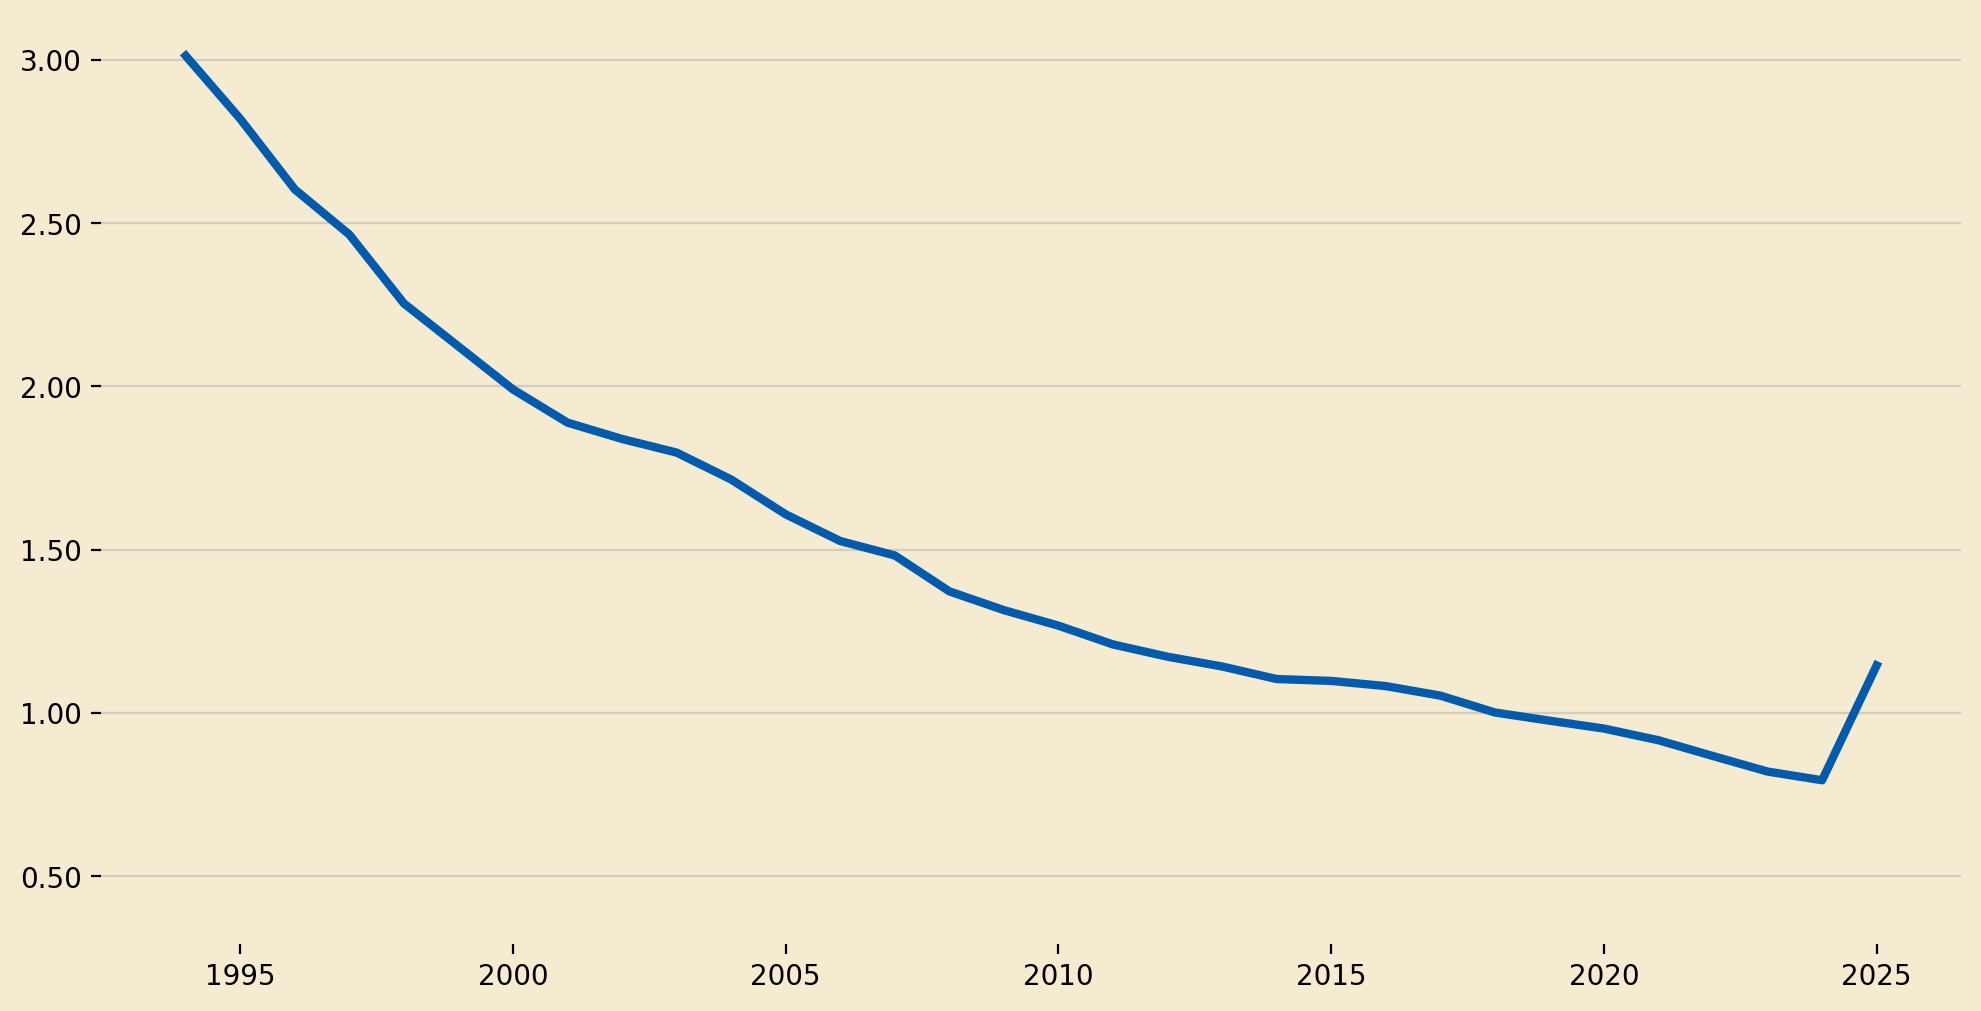

In [12]:
import matplotlib.pyplot as plt

# Calculate average purchasing power for each year
df['Avg'] = df[['Jan','Feb','Mar','Apr','May','Jun',
                'Jul','Aug','Sep','Oct','Nov','Dec']].mean(axis=1)

years = df['Year']
values = df['Avg']

plt.figure(figsize=(12,6))
plt.plot(years, values, color="#005BAC", linewidth=3)

# Ensure y-axis shows decimals and includes values below 1
plt.ylim(bottom=min(values) - 0.5)  # Optional: add a small margin below min value
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))

# Style
# Style
# Style
plt.grid(True, axis='y', linestyle="-", alpha=0.5)

# Remove plot box (spines)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.gca().set_facecolor("#F4EBD0")  # Set axes background
plt.gcf().set_facecolor("#F4EBD0")  # Set figure background

plt.savefig("chart.svg", dpi=300)  # SVG for design work
plt.show()

In [13]:
# Display rice price per year from 1994 to 2025

df = pd.read_csv('merged_output_w_price.csv')
rice_prices = df[(df['Year'] >= 1994) & (df['Year'] <= 2025)][['Year', 'Rice Price']]
print(rice_prices)

    Year  Rice Price
0   1994        5.90
1   1995        7.24
2   1996        8.13
3   1997        7.92
4   1998        8.30
5   1999        7.87
6   2000        8.42
7   2001        8.17
8   2002        8.82
9   2003        8.84
10  2004        9.45
11  2005       10.43
12  2006       10.46
13  2007       11.22
14  2008       14.13
15  2009       14.63
16  2010       14.87
17  2011       15.17
18  2012       16.22
19  2013       16.93
20  2014       20.07
21  2015       17.33
22  2016       17.43
23  2017       18.21
24  2018       20.40
25  2019       16.47
26  2020       16.72
27  2021       16.76
28  2022       17.44
29  2023       19.88
30  2024       23.33
31  2025       16.99
